In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pymc3 as pm
import seaborn as sns
import scipy.stats as stats
from numpy.linalg import norm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data = pd.read_csv("../datasets/adult.data",header =None, names=['age', 'workclass', 'fnlwgt',
                'education-categorical', 'educ',
                'marital-status', 'occupation',
                'relationship', 'race', 'sex',
                'captial-gain', 'capital-loss',
                'hours', 'native-country',
                'income'])

In [3]:
data.head()

,age,workclass,fnlwgt,education-categorical,educ,marital-status,occupation,relationship,race,sex,captial-gain,capital-loss,hours,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:

data = data[~pd.isnull(data['income'])]
data.shape

data = data[data['native-country']==' United-States']

income = 1*(data['income']==" >50K")
age2 = np.square(data['age'])


data = data[['age','educ','hours']]


data['age2'] = age2
data['income'] = income

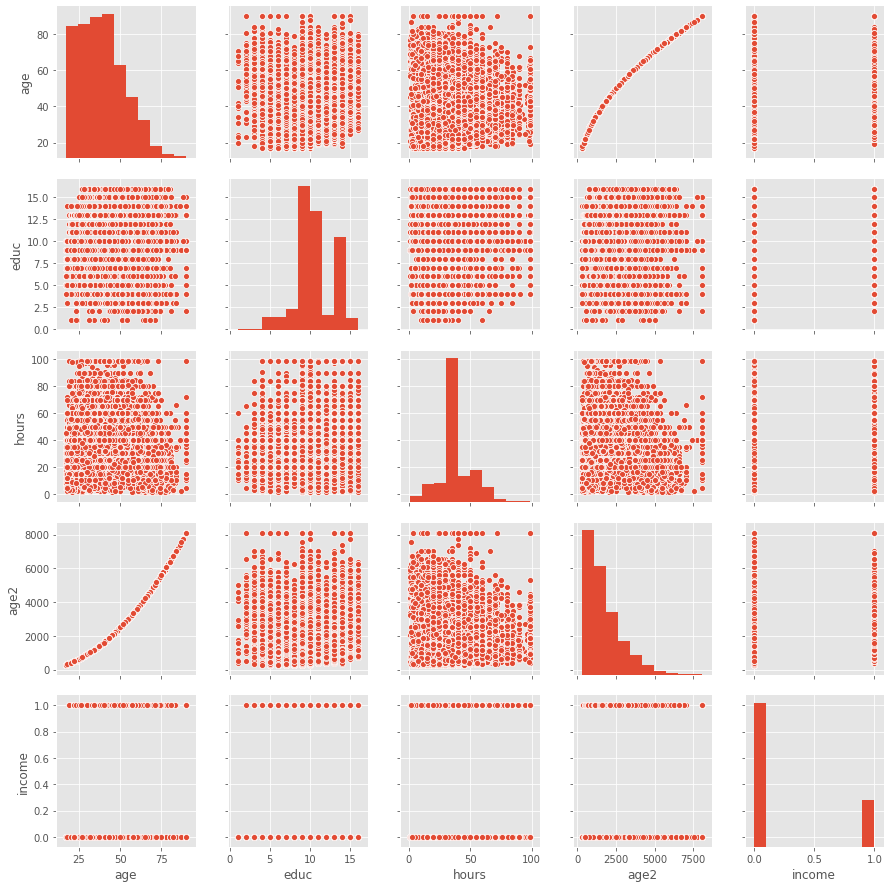

In [5]:
sns.pairplot(data)

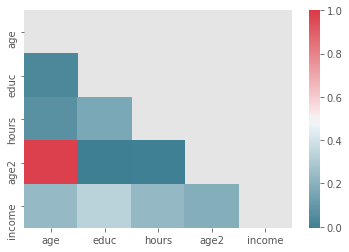

In [7]:

corr = data.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap);

In [14]:

with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('income ~ age + age2 + educ + hours', data, family=pm.glm.families.Binomial())
    trace_logistic_model = pm.sample(100, chains=1, tune=1000)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [hours, educ, age2, age, Intercept]
  0%|          | 0/1100 [00:00<?, ?it/s]


SamplingError: Bad initial energy